-------------------------------
### Load Data
_______________________________

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Diabetes','Age','Outcome']
data = pd.read_csv("pima-indians-diabetes.csv",names=names)

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



----------------------------------------
### Exploratory Data Analysis
-----------------------------------------


In [5]:
print("Rows:\t",data.shape[0])
print("\nColumns:\t",data.shape[1])
print("\nNumber of null values:\n",data.isnull().sum())
print("\nNumber of unique values\n",data.nunique())
print("\nNumber of Predicted values\n\n",data['Outcome'].value_counts())

Rows:	 768

Columns:	 9

Number of null values:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Diabetes         0
Age              0
Outcome          0
dtype: int64

Number of unique values
 Pregnancies       17
Glucose          136
BloodPressure     47
SkinThickness     51
Insulin          186
BMI              248
Diabetes         517
Age               52
Outcome            2
dtype: int64

Number of Predicted values

 0    500
1    268
Name: Outcome, dtype: int64


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
corr=data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
corr[corr>0.5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes,Age,Outcome
Pregnancies,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.544341,NaN
Glucose,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BloodPressure,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
SkinThickness,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Insulin,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
BMI,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Diabetes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Age,0.544341,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
data.skew()

Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
Diabetes         1.919911
Age              1.129597
Outcome          0.635017
dtype: float64

----------------------------------------
### Data Visualization
-----------------------------------------


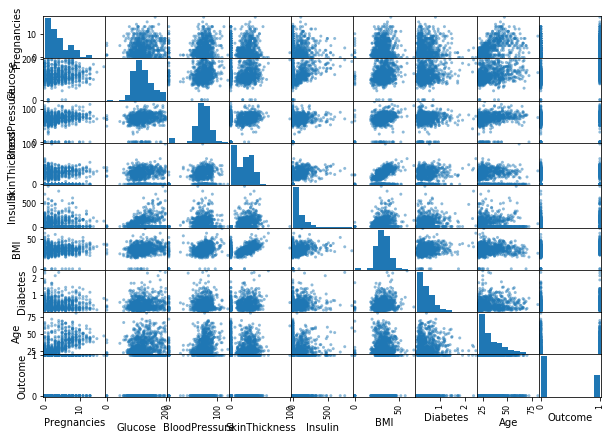

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,7));

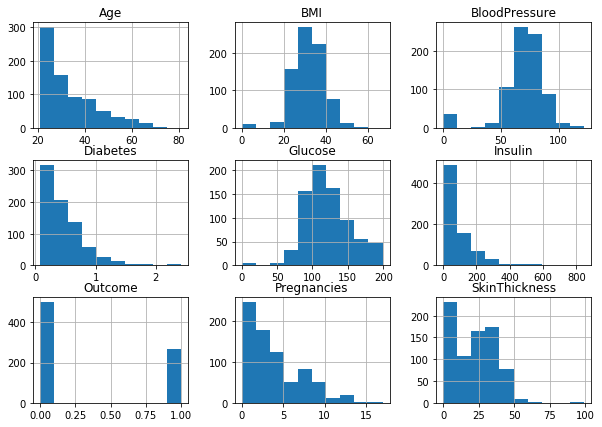

In [11]:
data.hist(figsize=(10,7));

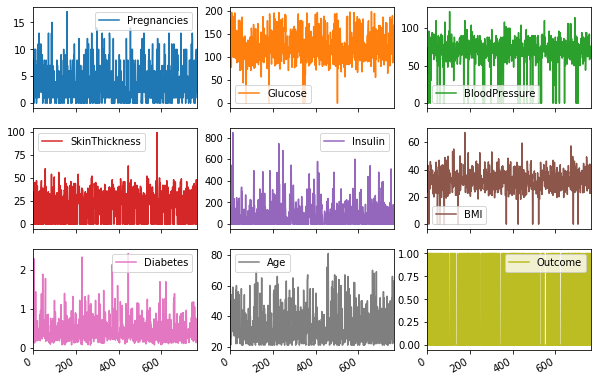

In [12]:
data.plot(kind='line',subplots=True,layout=(3,3),figsize=(10,7));

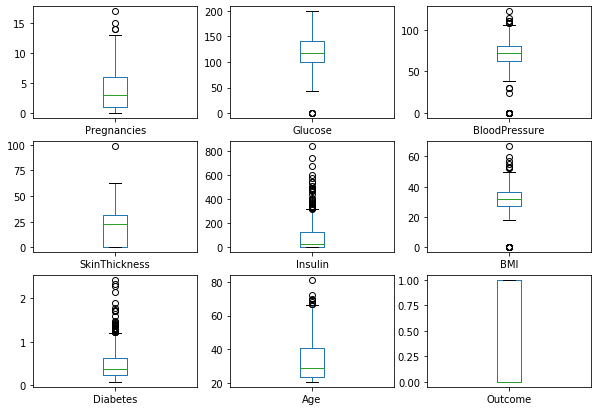

In [13]:
data.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,7));

----------------------------------------
#### HeatMap of correlation matrix
------------------------------------------

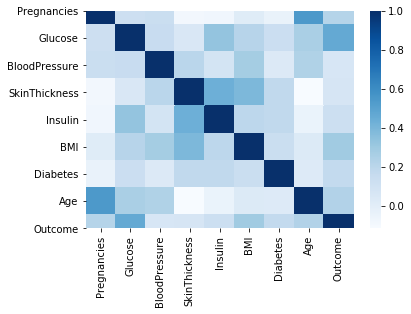

In [14]:
#sns.heatmap(data=corr,annot=True,cmap="Blues")
sns.heatmap(corr,cmap="Blues");

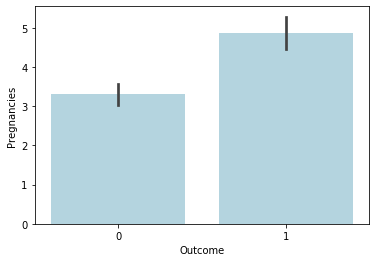

In [15]:
sns.barplot('Outcome','Pregnancies',data=data,color="LightBlue");

----------------------------------------
### Feature Importance and Scaling
----------------------------------------

In [16]:
pima = data.values
X = pima[:,0:8]
Y = pima[:,8]

In [17]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier 

In [20]:
model = ExtraTreesClassifier()
model.fit(X,Y)
print("feature_importances:",model.feature_importances_)

feature_importances: [0.11917399 0.23330038 0.09559457 0.08278182 0.0710223  0.13414004
 0.11059011 0.15339678]


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
Stdpima = StandardScaler().fit_transform(X)

-----------------------------------------------
### Model Building and  Comparison
------------------------------------------------

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [23]:
models =[]
models.append(("LR",LogisticRegression()))
models.append(("GNB",GaussianNB()))
models.append(("DTC",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [24]:
results =[]
names = []
for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model,X,Y,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(),"\tStdDeviation:" ,cv_results.std())

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

LR 0.7695146958304853 	StdDeviation: 0.04841051924567195
GNB 0.7551777170198223 	StdDeviation: 0.04276593954064409
DTC 0.6744019138755981 	StdDeviation: 0.0642951615989676


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM 0.6510252904989747 	StdDeviation: 0.07214083485055327


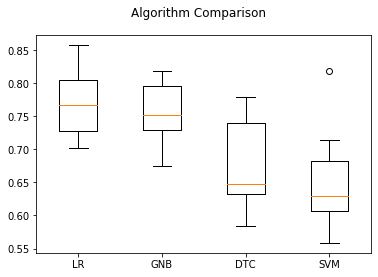

In [25]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

--------------------------------------
### VOTING ENSEMBLE METHOD
--------------------------------------

In [26]:
from sklearn.ensemble import VotingClassifier

In [27]:
estimators = []
estimators.append(("LR",LogisticRegression()))
estimators.append(("GNB",GaussianNB()))
estimators.append(("DTC",DecisionTreeClassifier()))
estimators.append(("SVM",SVC()))

In [28]:
names=[]
ensemble = VotingClassifier(estimators)
result = cross_val_score(ensemble,X,Y,cv=kfold)
names.append(name)
print(name,result.mean())

C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

SVM 0.7303827751196172


C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vishn\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

--------------------------
### REPORT GENERATION
---------------------------

In [29]:
report = pd.DataFrame({
    "Model":['LogisticRegression','SupportVectorMachine','GaussianNB','DecisionTreeClassifier'],
    "Score":['0.7695','0.6510','0.7551','0.6952'],
    "StdDeviation":['0.0484','0.07214','0.0427','0.0482']
})
report

,Model,Score,StdDeviation
0,LogisticRegression,0.7695,0.0484
1,SupportVectorMachine,0.6510,0.07214
2,GaussianNB,0.7551,0.0427
3,DecisionTreeClassifier,0.6952,0.0482
